In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

Solving environment: done

# All requested packages already installed.



In [2]:
df_data_1 = pd.read_csv(body)
df_data_1.head()



,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,Average Income,Unnamed: 7
0,0,North Chennai,Red Hills,13.1865,80.1999,743186,56837.022200,NaN
1,1,North Chennai,Ayanavaram,13.0979,80.2306,474289,41991.817440,NaN
2,2,North Chennai,Royapuram,13.1137,80.2954,527874,6667.447632,NaN
3,3,North Chennai,Korukkupet,13.1186,80.2780,893629,53270.063890,NaN
4,4,North Chennai,Vyasarpadi,13.1184,80.2594,730999,50712.430220,NaN


In [3]:
df=df_data_1
df.head(10)

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,Average Income,Unnamed: 7
0,0,North Chennai,Red Hills,13.1865,80.1999,743186,56837.022200,NaN
1,1,North Chennai,Ayanavaram,13.0979,80.2306,474289,41991.817440,NaN
2,2,North Chennai,Royapuram,13.1137,80.2954,527874,6667.447632,NaN
3,3,North Chennai,Korukkupet,13.1186,80.2780,893629,53270.063890,NaN
4,4,North Chennai,Vyasarpadi,13.1184,80.2594,730999,50712.430220,NaN
5,5,West Chennai,Porur,13.0382,80.1565,981362,60967.535870,NaN
6,6,West Chennai,Anna Nagar,13.0850,80.2101,662625,59943.541560,NaN
7,7,West Chennai,Aminjikarai,13.0706,80.2279,396862,58407.090340,NaN
8,8,West Chennai,Ambattur,13.1077,80.1522,77836,55850.962100,NaN
9,9,West Chennai,Defence Colony,28.5734,77.2326,656726,41007.219540,NaN


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Creating 'Population' and 'Income' dataframe from the main dataframe

In [5]:
Chennai_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [6]:
Chennai_population.head(10)

,Borough,Neighborhoods,Population
0,North Chennai,Red Hills,743186
1,North Chennai,Ayanavaram,474289
2,North Chennai,Royapuram,527874
3,North Chennai,Korukkupet,893629
4,North Chennai,Vyasarpadi,730999
5,West Chennai,Porur,981362
6,West Chennai,Anna Nagar,662625
7,West Chennai,Aminjikarai,396862
8,West Chennai,Ambattur,77836
9,West Chennai,Defence Colony,656726


In [9]:
Chennai_income = pd.DataFrame(df[['Borough','Neighborhoods','Average Income']])

In [11]:
Chennai_income.head(10)

,Borough,Neighborhoods,Average Income
0,North Chennai,Red Hills,56837.022200
1,North Chennai,Ayanavaram,41991.817440
2,North Chennai,Royapuram,6667.447632
3,North Chennai,Korukkupet,53270.063890
4,North Chennai,Vyasarpadi,50712.430220
5,West Chennai,Porur,60967.535870
6,West Chennai,Anna Nagar,59943.541560
7,West Chennai,Aminjikarai,58407.090340
8,West Chennai,Ambattur,55850.962100
9,West Chennai,Defence Colony,41007.219540


In [12]:
Chennai_latitude = df['Latitude'].mean()
Chennai_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Chennai are : ",Chennai_latitude,Chennai_longitude)

Latitude and Longitude of Chennai are :  13.580499999999999 80.00803199999999


In [13]:
CLIENT_ID = 'GFL3O1G2KPKKRQH3VDUNMBLXYFTSRNFPM5LOEMNQ4ZV143AF' 
CLIENT_SECRET = 'SE0TAVI1M1DK43VGJX51L50T5QQZFVVBRWNV2KOSM4V3GRB2'
VERSION = '20180606'
LIMIT = 150

In [14]:
unique_boroughs_of_Chennai = df['Borough'].unique().tolist()

In [15]:
unique_boroughs_of_Chennai 

['North Chennai', 'West Chennai', 'South and East Chennai']

In [16]:
borough_colors ={}
for i in unique_boroughs_of_Chennai:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [17]:
borough_colors

{'North Chennai': '#FF77C1',
 'West Chennai': '#681F32',
 'South and East Chennai': '#8C1257'}

In [18]:
Chennai_map = folium.Map(location=[Chennai_latitude,Chennai_longitude],zoom_start=12,control_scale=True)

In [19]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(Chennai_map)

In [20]:
Chennai_map

<h1><b>Exploring Chennai Neighborhoods using Foursquare API</b>
</h1>

In [21]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [22]:
Chennai_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Red Hills
Fetching venues for :  Ayanavaram
Fetching venues for :  Royapuram
Fetching venues for :  Korukkupet
Fetching venues for :  Vyasarpadi
Fetching venues for :  Porur
Fetching venues for :  Anna Nagar
Fetching venues for :  Aminjikarai
Fetching venues for :  Ambattur
Fetching venues for :  Defence Colony
Fetching venues for :  Teynampet
Fetching venues for :  Thousand Lights
Fetching venues for :  Gopalapuram
Fetching venues for :  Mylapore
Fetching venues for :  Egmore
Fetching venues for :  Virugambakkam
Fetching venues for :  Alwarthirunagar
Fetching venues for :  Valasaravakkam
Fetching venues for :  Thirunindravur
Fetching venues for :  Thirumangalam
Fetching venues for :  Avadi
Fetching venues for :  Kathivakkam
Fetching venues for :  Kodambakkam
Fetching venues for :  Kathirvedu
Fetching venues for :  Erukanchery


In [23]:
print("Total number of venues found in Chennai are : ",Chennai_venues.shape[0])

Total number of venues found in Chennai are :  198


In [24]:
Chennai_venues.head(10)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ayanavaram,North Chennai,13.0979,80.2306,Railway Officers Shuttle court,13.100031,80.229858,Tennis Court
1,Ayanavaram,North Chennai,13.0979,80.2306,Noor hotel bus stand,13.098520,80.234302,Diner
2,Ayanavaram,North Chennai,13.0979,80.2306,Noor Hotel,13.094934,80.233038,Restaurant
3,Ayanavaram,North Chennai,13.0979,80.2306,Shri Gopikrishna Theatre,13.095079,80.227423,Indie Movie Theater
4,Royapuram,North Chennai,13.1137,80.2954,Ibaco,13.115612,80.294837,Dessert Shop
5,Royapuram,North Chennai,13.1137,80.2954,Bakers Spring,13.113837,80.292560,Bakery
6,Royapuram,North Chennai,13.1137,80.2954,IDREAM Theater,13.116094,80.293191,Movie Theater
7,Royapuram,North Chennai,13.1137,80.2954,Pizza Corner,13.115437,80.292601,Pizza Place
8,Korukkupet,North Chennai,13.1186,80.2780,Korukkupettai rail station,13.120303,80.278466,Train Station
9,Vyasarpadi,North Chennai,13.1184,80.2594,M.k.B nagar Bus Depo,13.118100,80.261200,Bus Station


In [25]:
Chennai_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant                25
Café                             12
Hotel                             9
Ice Cream Shop                    8
Restaurant                        7
Vegetarian / Vegan Restaurant     7
Bakery                            7
Fast Food Restaurant              6
Italian Restaurant                5
Lounge                            4
Name: Neighborhood, dtype: int64

In [26]:
print("Total number of unique categories in Chennai are : ",len(Chennai_venues['Venue Category'].unique()))

Total number of unique categories in Chennai are :  76


<b>Getting number of venues per Neighborhood</b>

In [27]:
individual_Chennai_venue_count = Chennai_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [28]:
individual_Chennai_venue_count

Borough
Borough                Neighborhood            
North Chennai          Avadi                  1
                       Ayanavaram             4
                       Erukanchery            4
                       Kathirvedu             2
                       Kathivakkam            3
                       Kodambakkam            4
                       Korukkupet             1
                       Royapuram              4
                       Vyasarpadi             5
South and East Chennai Egmore                12
                       Gopalapuram           32
                       Mylapore              11
                       Teynampet             14
                       Thousand Lights       24
West Chennai           Alwarthirunagar        9
                       Ambattur               1
                       Aminjikarai            4
                       Anna Nagar            31
                       Defence Colony        20
                       Porur                  4
                       Thirumangalam          1
                       Valasaravakkam         5
                       Virugambakkam          2

In [29]:
individual_Chennai_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [30]:
individual_Chennai_venue_count.reset_index(inplace=True)

In [31]:
individual_Chennai_venue_count

,Borough,Neighborhood,NumberOfVenues
0,North Chennai,Avadi,1
1,North Chennai,Ayanavaram,4
2,North Chennai,Erukanchery,4
3,North Chennai,Kathirvedu,2
4,North Chennai,Kathivakkam,3
5,North Chennai,Kodambakkam,4
6,North Chennai,Korukkupet,1
7,North Chennai,Royapuram,4
8,North Chennai,Vyasarpadi,5
9,South and East Chennai,Egmore,12


[Text(0, 0, 'Avadi'),
 Text(0, 0, 'Ayanavaram'),
 Text(0, 0, 'Erukanchery'),
 Text(0, 0, 'Kathirvedu'),
 Text(0, 0, 'Kathivakkam'),
 Text(0, 0, 'Kodambakkam'),
 Text(0, 0, 'Korukkupet'),
 Text(0, 0, 'Royapuram'),
 Text(0, 0, 'Vyasarpadi'),
 Text(0, 0, 'Egmore'),
 Text(0, 0, 'Gopalapuram'),
 Text(0, 0, 'Mylapore'),
 Text(0, 0, 'Teynampet'),
 Text(0, 0, 'Thousand Lights'),
 Text(0, 0, 'Alwarthirunagar'),
 Text(0, 0, 'Ambattur'),
 Text(0, 0, 'Aminjikarai'),
 Text(0, 0, 'Anna Nagar'),
 Text(0, 0, 'Defence Colony'),
 Text(0, 0, 'Porur'),
 Text(0, 0, 'Thirumangalam'),
 Text(0, 0, 'Valasaravakkam'),
 Text(0, 0, 'Virugambakkam')]

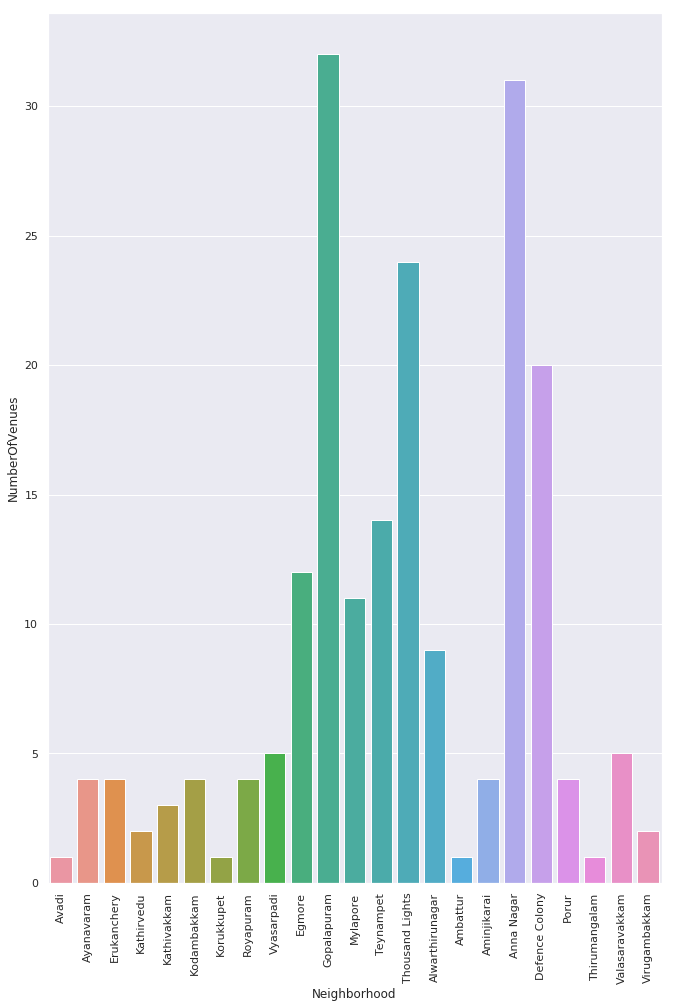

In [32]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_Chennai_venue_count)
plot.set_xticklabels(individual_Chennai_venue_count['Neighborhood'],rotation=90)

From the map , we can see that Gopalapuram has more number of venues

<h1><b>Exploring Anna Nagar Venues</b>
</h1>

In [33]:
Chennai_venues[Chennai_venues['Neighborhood']=='Anna Nagar']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
18,Anna Nagar,West Chennai,13.085,80.2101,Shankar Chat Bhandar,13.086593,80.210253,Snack Place
19,Anna Nagar,West Chennai,13.085,80.2101,99°F Fitness Studio,13.084923,80.211343,Gym
20,Anna Nagar,West Chennai,13.085,80.2101,Subway,13.082455,80.210927,Sandwich Place
21,Anna Nagar,West Chennai,13.085,80.2101,Starbucks,13.084861,80.212447,Coffee Shop
22,Anna Nagar,West Chennai,13.085,80.2101,amala mess,13.085722,80.208533,Fast Food Restaurant
23,Anna Nagar,West Chennai,13.085,80.2101,The Cascade,13.084094,80.210099,Chinese Restaurant
24,Anna Nagar,West Chennai,13.085,80.2101,Anna Nagar Tower Park,13.086571,80.213627,Park
25,Anna Nagar,West Chennai,13.085,80.2101,Shree Mithai - Divine Restaurant,13.082376,80.212013,Indian Restaurant
26,Anna Nagar,West Chennai,13.085,80.2101,Creamy Inn,13.082427,80.212199,Ice Cream Shop
27,Anna Nagar,West Chennai,13.085,80.2101,Karthick Tiffin Center,13.082099,80.209607,Indian Restaurant


<b>One hot encoding for letting us to compare different venues based on some common scale</b>

In [34]:
Chennai_venues_onehot = pd.get_dummies(Chennai_venues[['Venue Category']])

In [35]:
Chennai_venues_onehot

,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Art Gallery,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Astrologer,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bar,Venue Category_Bistro,...,Venue Category_South Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Steakhouse,Venue Category_Tea Room,Venue Category_Tennis Court,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
Chennai_venues_onehot['Neighborhood'] = Chennai_venues['Neighborhood']
Chennai_venues_grouped = Chennai_venues_onehot.groupby('Neighborhood').mean().reset_index()
Chennai_venues_grouped

,Neighborhood,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Art Gallery,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Astrologer,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bar,...,Venue Category_South Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Steakhouse,Venue Category_Tea Room,Venue Category_Tennis Court,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Women's Store
0,Alwarthirunagar,0.00000,0.000000,0.000000,0.00000,0.00,0.0,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00,0.111111,0.00,0.000000,0.000000,0.000000,0.111111,0.00000
1,Ambattur,0.00000,0.000000,0.000000,0.00000,0.00,0.0,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
2,Aminjikarai,0.00000,0.000000,0.000000,0.00000,0.00,0.0,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
3,Anna Nagar,0.00000,0.032258,0.000000,0.00000,0.00,0.0,0.032258,0.032258,0.00000,...,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.064516,0.00000
4,Avadi,0.00000,0.000000,0.000000,0.00000,0.00,0.0,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
5,Ayanavaram,0.00000,0.000000,0.000000,0.00000,0.00,0.0,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.00000
6,Defence Colony,0.00000,0.000000,0.000000,0.00000,0.00,0.0,0.000000,0.100000,0.05000,...,0.05000,0.000000,0.05,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
7,Egmore,0.00000,0.000000,0.000000,0.00000,0.00,0.0,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00,0.000000,0.00,0.083333,0.083333,0.000000,0.083333,0.00000
8,Erukanchery,0.00000,0.000000,0.000000,0.00000,0.25,0.0,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
9,Gopalapuram,0.03125,0.000000,0.000000,0.03125,0.00,0.0,0.000000,0.000000,0.03125,...,0.03125,0.000000,0.00,0.031250,0.00,0.000000,0.000000,0.000000,0.000000,0.03125


In [37]:
number_of_top_venues = 5

In [38]:
for hood in Chennai_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = Chennai_venues_grouped[Chennai_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Alwarthirunagar ---------
                                 Venue  Frequency
0  Venue Category_Fast Food Restaurant       0.22
1     Venue Category_Indian Restaurant       0.11
2              Venue Category_Tea Room       0.11
3                  Venue Category_Café       0.11
4                   Venue Category_Gym       0.11


--------- Ambattur ---------
                               Venue  Frequency
0         Venue Category_Bus Station        1.0
1  Venue Category_African Restaurant        0.0
2       Venue Category_Metro Station        0.0
3            Venue Category_Pharmacy        0.0
4                Venue Category_Park        0.0


--------- Aminjikarai ---------
                                 Venue  Frequency
0            Venue Category_Restaurant       0.25
1             Venue Category_Juice Bar       0.25
2           Venue Category_Pizza Place       0.25
3  Venue Category_Fast Food Restaurant       0.25
4    Venue Category_African Restaurant       0.00


---------

In [39]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [40]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Chennai_venues_grouped['Neighborhood']

for ind in np.arange(Chennai_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chennai_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,Venue Category_Arts & Crafts Store
1,Ambattur,Venue Category_Bus Station,Venue Category_Women's Store,Venue Category_Farmers Market,Venue Category_Currency Exchange,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant
2,Aminjikarai,Venue Category_Pizza Place,Venue Category_Restaurant,Venue Category_Juice Bar,Venue Category_Fast Food Restaurant,Venue Category_Donut Shop,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Currency Exchange,Venue Category_Department Store,Venue Category_Dessert Shop
3,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,Venue Category_Indian Sweet Shop,Venue Category_Farmers Market
4,Avadi,Venue Category_Pharmacy,Venue Category_Electronics Store,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Currency Exchange,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Women's Store


In [41]:
neighborhoods_venues_sorted.shape

(23, 11)

<b>Find the optimal k value for clustering and we do it using the elbow method</b>

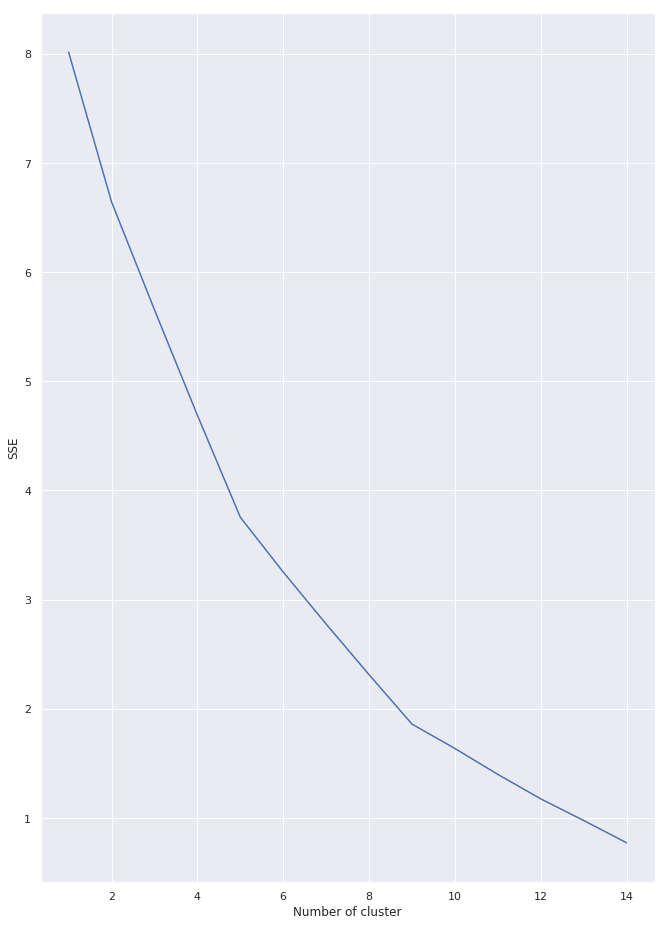

In [44]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(Chennai_venues_grouped.drop('Neighborhood',axis=1))
    Chennai_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The optimal value of cluster is 5

In [45]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [46]:
kmeans.fit(Chennai_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [47]:
Chennai_venues_grouped['Cluster'] = kmeans.labels_

In [48]:
Chennai_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    11
1     3
2     4
3     3
4     2
Name: Neighborhood, dtype: int64

In [49]:
Chennai_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_African Restaurant',
       'Venue Category_American Restaurant', 'Venue Category_Art Gallery',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Astrologer', 'Venue Category_BBQ Joint',
       'Venue Category_Bakery', 'Venue Category_Bar', 'Venue Category_Bistro',
       'Venue Category_Boutique', 'Venue Category_Bowling Alley',
       'Venue Category_Bridal Shop', 'Venue Category_Buffet',
       'Venue Category_Burger Joint', 'Venue Category_Bus Station',
       'Venue Category_Café', 'Venue Category_Chinese Restaurant',
       'Venue Category_Clothing Store', 'Venue Category_Coffee Shop',
       'Venue Category_Concert Hall', 'Venue Category_Currency Exchange',
       'Venue Category_Department Store', 'Venue Category_Dessert Shop',
       'Venue Category_Diner', 'Venue Category_Donut Shop',
       'Venue Category_Electronics Store', 'Venue Category_Farmers Market',
       'Venue Category_Fas

In [50]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(Chennai_venues_grouped,on='Neighborhood')

In [51]:
neighborhoods_venues_sorted.head(5)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Sporting Goods Shop,Venue Category_Steakhouse,Venue Category_Tea Room,Venue Category_Tennis Court,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Women's Store,Cluster
0,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.0,0
1,Ambattur,Venue Category_Bus Station,Venue Category_Women's Store,Venue Category_Farmers Market,Venue Category_Currency Exchange,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Electronics Store,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,4
2,Aminjikarai,Venue Category_Pizza Place,Venue Category_Restaurant,Venue Category_Juice Bar,Venue Category_Fast Food Restaurant,Venue Category_Donut Shop,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Currency Exchange,Venue Category_Department Store,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,2
3,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,Venue Category_Indian Sweet Shop,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.064516,0.0,0
4,Avadi,Venue Category_Pharmacy,Venue Category_Electronics Store,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Currency Exchange,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Donut Shop,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,4


In [52]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(Chennai_venues,on='Neighborhood')

In [53]:
# create map
map_clusters = folium.Map(location=[Chennai_latitude, Chennai_longitude], zoom_start=11)

In [54]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [55]:
map_clusters

<h2><b>Finding similar locations based on user input (recommending location)</b>
</h2>

We need to analyze factors such as population and Income to recommend

In [56]:
Chennai_income.head()

,Borough,Neighborhoods,Average Income
0,North Chennai,Red Hills,56837.022200
1,North Chennai,Ayanavaram,41991.817440
2,North Chennai,Royapuram,6667.447632
3,North Chennai,Korukkupet,53270.063890
4,North Chennai,Vyasarpadi,50712.430220


In [57]:
Chennai_population.head()

,Borough,Neighborhoods,Population
0,North Chennai,Red Hills,743186
1,North Chennai,Ayanavaram,474289
2,North Chennai,Royapuram,527874
3,North Chennai,Korukkupet,893629
4,North Chennai,Vyasarpadi,730999


In [58]:
Chennai_population['Normalized_population'] = Chennai_population['Population']/Chennai_population['Population'].max(axis=0)
Chennai_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,North Chennai,Red Hills,743186,0.757301
1,North Chennai,Ayanavaram,474289,0.483297
2,North Chennai,Royapuram,527874,0.537899
3,North Chennai,Korukkupet,893629,0.910601
4,North Chennai,Vyasarpadi,730999,0.744882


In [60]:
Chennai_income['Normalized_income'] = Chennai_income['Average Income']/Chennai_income['Average Income'].max(axis=0)
Chennai_income.head()

,Borough,Neighborhoods,Average Income,Normalized_income
0,North Chennai,Red Hills,56837.022200,0.932251
1,North Chennai,Ayanavaram,41991.817440,0.688757
2,North Chennai,Royapuram,6667.447632,0.109361
3,North Chennai,Korukkupet,53270.063890,0.873745
4,North Chennai,Vyasarpadi,50712.430220,0.831794


In [61]:
Chennai_venues_grouped.head(1)

,Neighborhood,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Art Gallery,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Astrologer,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bar,...,Venue Category_Sporting Goods Shop,Venue Category_Steakhouse,Venue Category_Tea Room,Venue Category_Tennis Court,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Women's Store,Cluster
0,Alwarthirunagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.0,0


In [62]:
Chennai_veg = Chennai_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
Chennai_veg.head()

,Neighborhood,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Art Gallery,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Astrologer,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bar,...,Venue Category_South Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Steakhouse,Venue Category_Tea Room,Venue Category_Tennis Court,Venue Category_Thai Restaurant,Venue Category_Theater,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Women's Store
0,Alwarthirunagar,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,Ambattur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aminjikarai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anna Nagar,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,2,0
4,Avadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
Chennai_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     1
1     0
2     0
3     2
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    2
15    0
16    0
17    0
18    0
19    1
20    0
21    0
22    0
Name: Venue Category_Vegetarian / Vegan Restaurant, dtype: uint8

In [64]:
Chennai_veg = Chennai_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [65]:
Chennai_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [66]:
Chennai_veg.head()


,Neighborhood,NumberOfVegRestaurants
0,Alwarthirunagar,1
1,Ambattur,0
2,Aminjikarai,0
3,Anna Nagar,2
4,Avadi,0


In [67]:
Chennai_veg['NumberOfNonVeganrestaurants'] = 1-(Chennai_veg['NumberOfVegRestaurants']/Chennai_veg['NumberOfVegRestaurants'].max(axis=0))

In [68]:
Chennai_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Alwarthirunagar,1,0.5
1,Ambattur,0,1.0
2,Aminjikarai,0,1.0
3,Anna Nagar,2,0.0
4,Avadi,0,1.0
5,Ayanavaram,0,1.0
6,Defence Colony,0,1.0
7,Egmore,1,0.5
8,Erukanchery,0,1.0
9,Gopalapuram,0,1.0


In [69]:
Chennai_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

<h2><b>Building a target neighborhood by providing a sample restaurant : say ' Anna Nagar '</b>
    </h2>

In [70]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Anna Nagar']

In [71]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,14,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,...,0.064516,0.0,0,West Chennai,13.085,80.2101,Shankar Chat Bhandar,13.086593,80.210253,Snack Place
1,15,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,...,0.064516,0.0,0,West Chennai,13.085,80.2101,99°F Fitness Studio,13.084923,80.211343,Gym
2,16,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,...,0.064516,0.0,0,West Chennai,13.085,80.2101,Subway,13.082455,80.210927,Sandwich Place
3,17,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,...,0.064516,0.0,0,West Chennai,13.085,80.2101,Starbucks,13.084861,80.212447,Coffee Shop
4,18,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,...,0.064516,0.0,0,West Chennai,13.085,80.2101,amala mess,13.085722,80.208533,Fast Food Restaurant
5,19,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,...,0.064516,0.0,0,West Chennai,13.085,80.2101,The Cascade,13.084094,80.210099,Chinese Restaurant
6,20,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,...,0.064516,0.0,0,West Chennai,13.085,80.2101,Anna Nagar Tower Park,13.086571,80.213627,Park
7,21,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,...,0.064516,0.0,0,West Chennai,13.085,80.2101,Shree Mithai - Divine Restaurant,13.082376,80.212013,Indian Restaurant
8,22,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,...,0.064516,0.0,0,West Chennai,13.085,80.2101,Creamy Inn,13.082427,80.212199,Ice Cream Shop
9,23,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Burger Joint,Venue Category_Gym,...,0.064516,0.0,0,West Chennai,

In [72]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [73]:
target_cluster

0

In [74]:
print("The target cluster is : ",target_cluster)

The target cluster is :  0


In [75]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,0.111111,0.0,0,West Chennai,13.0426,80.184,KFC,13.044008,80.184089,Fast Food Restaurant
1,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,0.111111,0.0,0,West Chennai,13.0426,80.184,Domino's Pizza,13.043000,80.184000,Pizza Place
2,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,0.111111,0.0,0,West Chennai,13.0426,80.184,Inshape Health & Fitnez,13.045845,80.186789,Gym
3,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,0.111111,0.0,0,West Chennai,13.0426,80.184,Ibaco,13.042061,80.187062,Ice Cream Shop
4,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,0.111111,0.0,0,West Chennai,13.0426,80.184,McDonald's,13.042670,80.181738,Fast Food Restaurant


In [76]:
print("There are {} neighborhoods which has similar characteristics to Anna Nagar.".format(possible_neighborhoods.shape[0]))

There are 160 neighborhoods which has similar characteristics to Anna Nagar.


In [77]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,...,0.111111,0.0,0,West Chennai,13.0426,80.184,KFC,13.044008,80.184089,Fast Food Restaurant
1,1,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,...,0.111111,0.0,0,West Chennai,13.0426,80.184,Domino's Pizza,13.043000,80.184000,Pizza Place
2,2,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,...,0.111111,0.0,0,West Chennai,13.0426,80.184,Inshape Health & Fitnez,13.045845,80.186789,Gym
3,3,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,...,0.111111,0.0,0,West Chennai,13.0426,80.184,Ibaco,13.042061,80.187062,Ice Cream Shop
4,4,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,...,0.111111,0.0,0,West Chennai,13.0426,80.184,McDonald's,13.042670,80.181738,Fast Food Restaurant


In [78]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [79]:
possible_neighborhoods = possible_neighborhoods.merge(Chennai_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(Chennai_income[['Neighborhoods','Average Income','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(Chennai_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [80]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,Average Income,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,KFC,13.044008,80.184089,Fast Food Restaurant,249182,0.253914,58448.65852,0.958685,1,0.5
1,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,Domino's Pizza,13.043000,80.184000,Pizza Place,249182,0.253914,58448.65852,0.958685,1,0.5
2,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,Inshape Health & Fitnez,13.045845,80.186789,Gym,249182,0.253914,58448.65852,0.958685,1,0.5
3,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,Ibaco,13.042061,80.187062,Ice Cream Shop,249182,0.253914,58448.65852,0.958685,1,0.5
4,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Astrologer,...,McDonald's,13.042670,80.181738,Fast Food Restaurant,249182,0.253914,58448.65852,0.958685,1,0.5


In [81]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [82]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,Average Income,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Teynampet,Venue Category_Lounge,Venue Category_Kerala Restaurant,Venue Category_Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Garden,Venue Category_Chinese Restaurant,Venue Category_Sporting Goods Shop,...,13.042879,80.248688,Lounge,942711,0.960615,26168.44809,0.429219,0,1.0,0.730534
1,Teynampet,Venue Category_Lounge,Venue Category_Kerala Restaurant,Venue Category_Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Garden,Venue Category_Chinese Restaurant,Venue Category_Sporting Goods Shop,...,13.042758,80.256164,Garden,942711,0.960615,26168.44809,0.429219,0,1.0,0.730534
2,Teynampet,Venue Category_Lounge,Venue Category_Kerala Restaurant,Venue Category_Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Garden,Venue Category_Chinese Restaurant,Venue Category_Sporting Goods Shop,...,13.042774,80.248645,Bowling Alley,942711,0.960615,26168.44809,0.429219,0,1.0,0.730534
3,Teynampet,Venue Category_Lounge,Venue Category_Kerala Restaurant,Venue Category_Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Garden,Venue Category_Chinese Restaurant,Venue Category_Sporting Goods Shop,...,13.042917,80.248514,Italian Restaurant,942711,0.960615,26168.44809,0.429219,0,1.0,0.730534
4,Teynampet,Venue Category_Lounge,Venue Category_Kerala Restaurant,Venue Category_Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Garden,Venue Category_Chinese Restaurant,Venue Category_Sporting Goods Shop,...,13.042801,80.248571,Lounge,942711,0.960615,26168.44809,0.429219,0,1.0,0.730534


In [83]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [84]:
top3_df = pd.DataFrame(top3).reset_index()

In [85]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Alwarthirunagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Café,[0.5124969581324629]
1,Anna Nagar,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Vegetarian / Vegan Restaurant,[0.6817262721270358]
2,Ayanavaram,Venue Category_Indie Movie Theater,Venue Category_Tennis Court,Venue Category_Restaurant,[0.5827132937277733]


<b>According to the above data, Alwarthirunagar, Anna Nagar and Ayanavaram are the top 3 neighborhoods for restaurent.</b>